Controle clássico para um Guindaste Hidráulico Florestal

In [89]:
# Operações com matrizes e vetores:
import numpy as np
import sympy as sp
import control as co_general
import control.matlab as co
import matplotlib.pyplot as plt


 - Declaração das FTs que serão usadas

In [90]:
# Simbolos utilizados:
s = co.tf('s')

In [91]:
# Função de transferência do sistema em malha aberta:
dem = s**6 + 0.02774*s**5 + 26.03*s**4 + 0.1328*s**3 + 30.03*s**2 - 0.1616*s - 120
num = -0.0002981*s**4 - 7.27e-07*s**3 - 0.001487*s**2 + 4.095e-07*s + 0.0009274
G = num/dem
 
print(G)


-0.0002981 s^4 - 7.27e-07 s^3 - 0.001487 s^2 + 4.095e-07 s + 0.0009274
-----------------------------------------------------------------------
s^6 + 0.02774 s^5 + 26.03 s^4 + 0.1328 s^3 + 30.03 s^2 - 0.1616 s - 120



- Identificando os polos do sistema em malha aberta

[-0.01181462+4.96099788j -0.01181462-4.96099788j -0.00154511+1.74020406j
 -0.00154511-1.74020406j -1.26938876+0.j          1.26836822+0.j        ]
[-0.00121991+2.35561333j -0.00121991-2.35561333j  0.74877063+0.j
 -0.74876958+0.j        ]


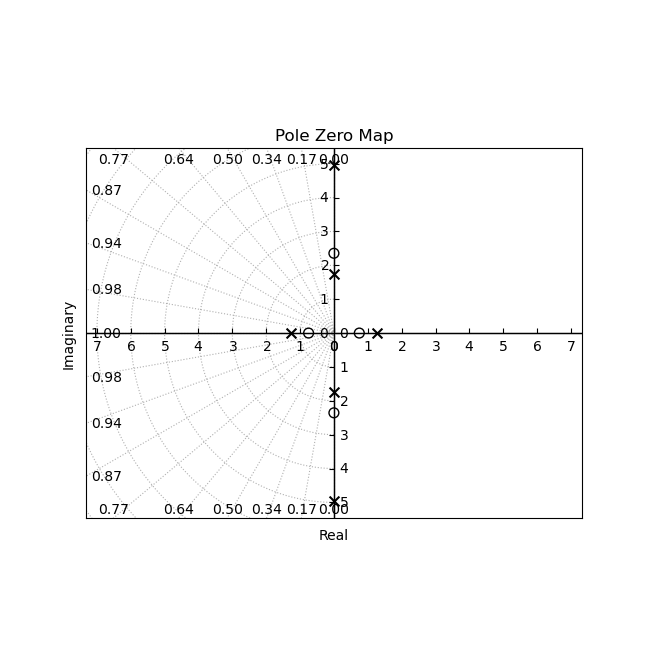

In [92]:
polos = co.pole(G)
zeros = co.zero(G)
co.pzmap(G, plot=True, grid=True, title='Pole Zero Map')


print(polos)
print(zeros)

- Calcula a estabilidade do sistema em malha aberta

In [93]:
# Verificando as condições de Routh-Hurwitz
# Script para verificar as condições de Routh-Hurwitz será disponibilizado em SCILAB
condicoes_estabilidade = np.all(np.real(polos) < 0)

if condicoes_estabilidade:
    print("O sistema é estável pelo critério de Routh-Hurwitz.")
else:
    print("O sistema é instável pelo critério de Routh-Hurwitz.")

O sistema é instável pelo critério de Routh-Hurwitz.


(array([7.83257035e-06, 7.83401714e-06, 7.83548395e-06, 7.83697105e-06,
        7.83847872e-06, 7.84000724e-06, 7.84155690e-06, 7.84312798e-06,
        7.84472079e-06, 7.84633562e-06, 7.84797277e-06, 7.84963256e-06,
        7.85131528e-06, 7.85302126e-06, 7.85475081e-06, 7.85650425e-06,
        7.85828192e-06, 7.86008415e-06, 7.86191127e-06, 7.86376362e-06,
        7.86564156e-06, 7.86754542e-06, 7.86947557e-06, 7.87143236e-06,
        7.87341616e-06, 7.87542734e-06, 7.87746627e-06, 7.87953333e-06,
        7.88162891e-06, 7.88375340e-06, 7.88590719e-06, 7.88809068e-06,
        7.89030428e-06, 7.89254840e-06, 7.89482346e-06, 7.89712987e-06,
        7.89946806e-06, 7.90183848e-06, 7.90424155e-06, 7.90667773e-06,
        7.90914746e-06, 7.91165120e-06, 7.91418942e-06, 7.91676258e-06,
        7.91937116e-06, 7.92201564e-06, 7.92469652e-06, 7.92741427e-06,
        7.93016942e-06, 7.93296245e-06, 7.93579390e-06, 7.93866428e-06,
        7.94157412e-06, 7.94452395e-06, 7.94751432e-06, 7.950545

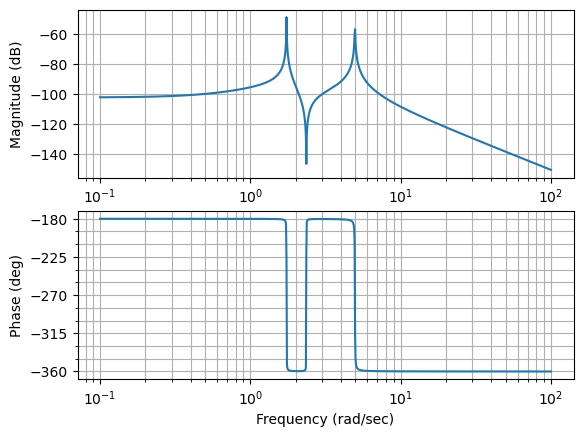

In [94]:
co.bode(G)

(array([-7.72833333e-06, -7.72833377e-06, -7.72833508e-06, ...,
         3.12170288e-10,  3.05057240e-10,  2.98106272e-10]),
 array([-0.00000000e+00,  1.42754888e-12,  2.85509851e-12, ...,
         8.08264316e-15,  7.80796641e-15,  7.54262434e-15]),
 array([0.00000000e+00, 2.04081633e-04, 4.08163265e-04, ...,
        9.77214697e+02, 9.88541702e+02, 1.00000000e+03]))

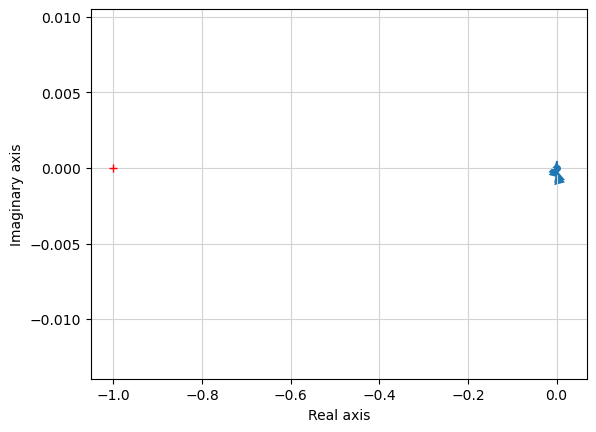

In [95]:
co.nyquist(G)

- Resposta do sistema em malha aberta a uma entrada degrau

/Users/guilhermepifferchristo/anaconda3/lib/python3.10/site-packages/control/timeresp.py:1025: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = expAdt @ xout[:, i-1]
/Users/guilhermepifferchristo/anaconda3/lib/python3.10/site-packages/control/timeresp.py:1025: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = expAdt @ xout[:, i-1]


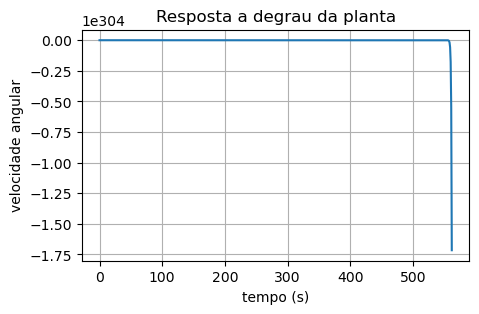

In [135]:
# Resposta a degrau da planta
plt.figure(2, figsize=(5,3))
theta2, t = co.impulse(G)
plt.plot(t,theta2)
plt.title('Resposta a degrau da planta')
plt.xlabel('tempo (s)')
plt.ylabel('velocidade angular')
plt.grid()

Ziegler-Nichols'

In [138]:
def pid_ziegler_nichols(g):
    _, y = co_general.step_response(g)

    k = y[-1]
    print(k)
    t = co_general.step_info(g)['RiseTime']
    
    kp = 1.2 * t / k
    ki = 2 * k 
    kd = 0.5 * k 
    
    return kp, ki, kd

In [98]:
# Calcular os parâmetros do controlador PID usando Ziegler-Nichols
kp, ki, kd = pid_ziegler_nichols(G)

# Exibir os parâmetros do controlador PID
print("Parâmetros do Controlador PID:")
print("Kp =", kp)
print("Ki =", ki)
print("Kd =", kd)

nan
Parâmetros do Controlador PID:
Kp = nan
Ki = inf
Kd = 0.0


/Users/guilhermepifferchristo/anaconda3/lib/python3.10/site-packages/control/timeresp.py:1565: RuntimeWarning: overflow encountered in divide
  np.abs(yout/InfValue-1) >= SettlingTimeThreshold)[0][-1]+1
/var/folders/60/nj67kb651dlb556srctrpq800000gn/T/ipykernel_57683/1745235810.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  ki = 1.2 / t


- Alocação de polos

In [137]:
# Converter a função de transferência em espaço de estados
sys_ss = co_general.tf2ss(G)

# Definir os polos desejados
polos_desejados = [-2, -3, -1, -0.5, -0.25, -0.1]

# Realizar a alocação de polos
K = co_general.place(sys_ss.A, sys_ss.B, polos_desejados)

# Exibir a matriz de ganhos do controlador
print("Matriz de ganhos do controlador:")
print(K)

# Converter o sistema em espaço de estados de volta para função de transferência
K_tf = co.ss2tf(K)


Matriz de ganhos do controlador:
[[  6.82226  -9.73     16.4297  -22.655     1.4991  120.075  ]]


TypeError: ss2tf(sys): sys must be a StateSpace object.  It is <class 'numpy.matrix'>.

- Controle Ótimo ITAE

In [100]:
def itae_cost(x, G):
    Kp = x
    Ki = x
    Kd = x
    C = co_general.tf([Kd, Kp, Ki], [1, 0])
    L = co_general.series(C, G)
    T = co_general.feedback(L, 1)
    t, y = co_general.step_response(T)
    e = 1 - y
    cost = sum(t * abs(e))
    return cost

/Users/guilhermepifferchristo/anaconda3/lib/python3.10/site-packages/control/timeresp.py:1054: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
/Users/guilhermepifferchristo/anaconda3/lib/python3.10/site-packages/control/timeresp.py:1054: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
/Users/guilhermepifferchristo/anaconda3/lib/python3.10/site-packages/control/timeresp.py:1056: RuntimeWarning: invalid value encountered in matmul
  yout = C @ xout + D @ U
/var/folders/60/nj67kb651dlb556srctrpq800000gn/T/ipykernel_57683/245879873.py:10: RuntimeWarning: overflow encountered in multiply
  cost = sum(t * abs(e))


Ganhos ótimos:
Kp = 2.2917960675006306
Ki = 0.3141640786499874
Kd = 0.2864745084375788
Função de transferência do controlador ótimo:
0 states have been removed from the model

2.292 s^2 + 0.3142 s + 0.2865
-----------------------------
              s



/Users/guilhermepifferchristo/anaconda3/lib/python3.10/site-packages/control/freqplot.py:943: UserWarning: number of encirclements was a non-integer value; this can happen is contour is not closed, possibly based on a frequency range that does not include zero.
  warnings.warn(


0

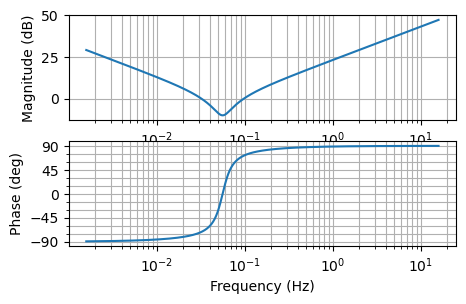

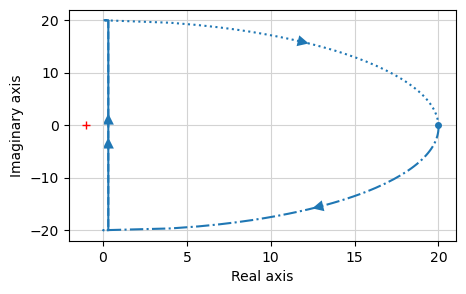

In [133]:
from scipy.optimize import minimize_scalar

# Encontrar os ganhos ótimos que minimizam o custo ITAE
result = minimize_scalar(itae_cost, args=(G,), bounds=(0, 10), method='bounded')

# Obter o ganho ótimo
K_opt = result.x
Kp = 0.6 * K_opt
Ki = 1.2 / K_opt
Kd = 0.075 * K_opt

# Criar o controlador PID ótimo
C = co_general.tf([Kp, Ki, Kd], [1, 0])

# Exibir os ganhos ótimos
print("Ganhos ótimos:")
print("Kp =", Kp)
print("Ki =", Ki)
print("Kd =", Kd)

# Exibir a função de transferência do controlador ótimo
print("Função de transferência do controlador ótimo:")
Gc = co_general.minreal(C)
print(Gc)

# Exibir o diagrama de Bode do controlador ótimo
plt.figure(3, figsize=(5,3))
co_general.bode(Gc, dB=True, Hz=True, deg=True, omega=np.logspace(-2, 2, 1000))

# Exibir o diagrama de Nyquist do controlador ótimo
plt.figure(4, figsize=(5,3))
co_general.nyquist(Gc)



- Lugar das raizes

[0.00000000e+00 6.37640631e+03 1.27528126e+04 1.91292189e+04
 2.55056252e+04 3.07997054e+04 3.60937855e+04 4.13878657e+04
 4.66819458e+04 4.66819458e+04 4.68329334e+04 4.68329334e+04
 5.10112505e+04 5.52189405e+04 5.52189405e+04 5.53546830e+04
 5.53546830e+04 6.06452312e+04 6.59357794e+04 7.12263276e+04
 7.65168757e+04 8.28932820e+04 8.92696883e+04 9.56460947e+04
 1.02022501e+05 1.08398907e+05 1.14775314e+05 1.21151720e+05
 1.27528126e+05 1.29393985e+05 1.35303927e+05 1.41213868e+05
 1.47123810e+05 1.53033751e+05 1.59410158e+05 1.65786564e+05
 1.72162970e+05 1.78539377e+05 1.84915783e+05 1.91292189e+05
 1.97668596e+05 2.04045002e+05 2.10421408e+05 2.16797815e+05
 2.23174221e+05 2.29550627e+05 2.35927033e+05 2.42303440e+05
 2.48679846e+05 2.55056252e+05 2.80561878e+05 3.06067503e+05
 3.31573128e+05 3.57078753e+05 3.82584379e+05 4.08090004e+05
 4.33595629e+05 4.59101254e+05 4.84606880e+05 5.10112505e+05
 5.35618130e+05 5.61123755e+05 5.86629381e+05 6.12135006e+05
 6.37640631e+05 6.631462

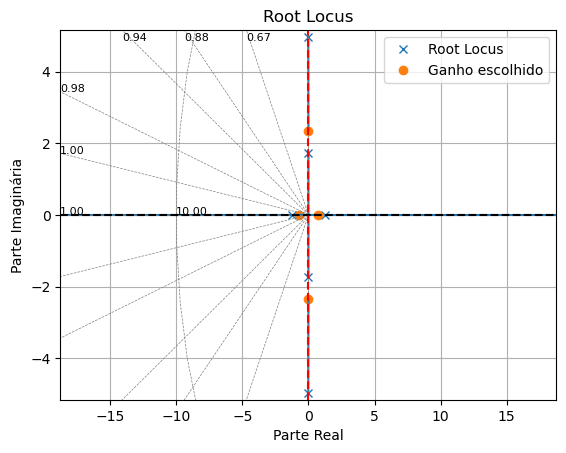

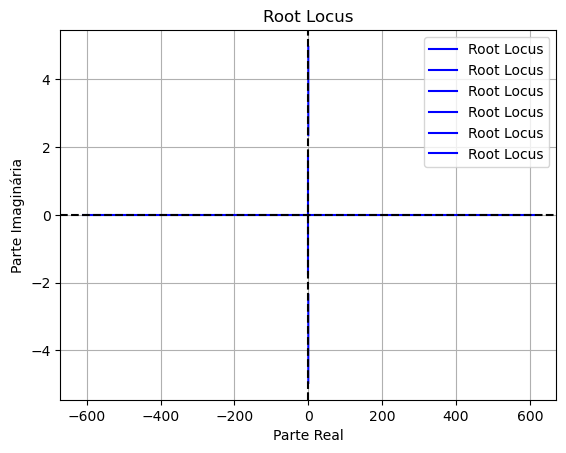

In [115]:
# Calcular o root locus
rlist, klist = co_general.root_locus(G)
print(klist)

# Encontrar os ganhos que estabilizam o sistema
stable_gains = []
for i in range(len(klist)):
    poles = co_general.pole(G * klist[i]+1)
    if np.all(np.real(poles) < 0) and poles.size > 0:
        stable_gains.append(klist[i])

# Escolher o valor do ganho que estabiliza o sistema
if len(stable_gains) > 0:
    chosen_gain = min(stable_gains)
    print("Valor do ganho escolhido:", chosen_gain)
else:
    print("Não foi possível encontrar um ganho que estabilize o sistema.")

# Plotar o root locus com o ganho escolhido
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=chosen_gain, color='r', linestyle='--')
plt.legend(['Root Locus', 'Ganho escolhido'])
plt.title("Root Locus")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.grid(True)
plt.show()

# Plotar o root locus
plt.figure()
plt.plot(rlist.real, rlist.imag, "b", label="Root Locus")
plt.axhline(y=0, color="k", linestyle="--")
plt.axvline(x=0, color="k", linestyle="--")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.title("Root Locus")
plt.grid(True)
plt.legend()
plt.show()

- Simulação com o controlador


-0.0006832 s^6 - 9.532e-05 s^5 - 0.003494 s^4 - 0.0004664 s^3 + 0.0017 s^2 + 0.0002915 s + 0.0002657
----------------------------------------------------------------------------------------------------
      s^7 + 0.02706 s^6 + 26.03 s^5 + 0.1293 s^4 + 30.03 s^3 - 0.1599 s^2 - 120 s + 0.0002657

[-1.15264600e-02+4.96099089j -1.15264600e-02-4.96099089j
 -1.51551508e-03+1.74020162j -1.51551508e-03-1.74020162j
 -1.26936824e+00+0.j          1.26839317e+00+0.j
  2.21397586e-06+0.j        ]


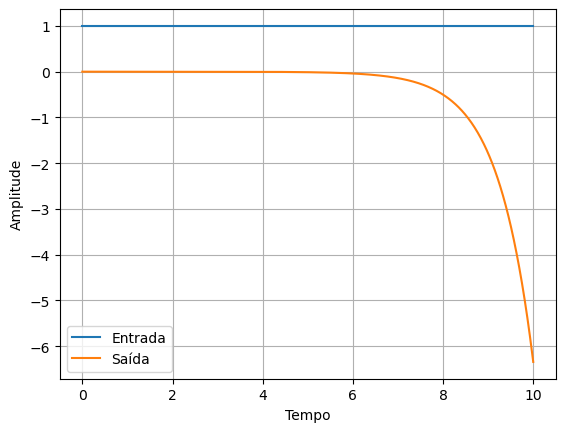

In [134]:
#Utilizando o Controlador ITAE
# Obter a função de transferência em malha fechada
T = co_general.feedback(Gc * G, 1)
poles = co_general.pole(T)
print(T)
print(poles)

# Definir o tempo de simulação
t = np.linspace(0, 10, 1000)

# Gerar a entrada degrau
u = np.ones_like(t)

# Simular o sistema controlado
t, y = co_general.step_response(T, T=t)

# Plotar o gráfico da resposta do sistema controlado
plt.plot(t, u, label='Entrada')
plt.plot(t, y, label='Saída')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()